# **EDA (Exploratory Data Analysis)**
---

In [1]:
import os
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore
from textwrap import wrap
from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore


image_path = '../../src/database/flickr8k/Images'
captions_txt = '../../src/database/flickr8k/captions.txt'
data = pd.read_csv('../../src/database/flickr8k/captions.txt')

2024-12-05 20:36:58.247992: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-05 20:36:58.251319: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-05 20:36:58.259035: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733449018.272331   53386 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733449018.275807   53386 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-05 20:36:58.290678: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
image_files = os.listdir(image_path)
image_files = [f for f in image_files if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
total_images = len(image_files)
print(f"Total de imágenes: {total_images}")

Total de imágenes: 8091


In [3]:
data.describe()

,image,caption
count,40455,40455
unique,8091,40201
top,997722733_0cb5439472.jpg,Two dogs playing in the snow .
freq,5,7


In [4]:
def readImage(path,img_size=224):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    return img

def display_images(temp_df, image_path=image_path):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.7, wspace = 0.3)
        image = readImage(f"{image_path}/{temp_df.image[i]}")
        plt.imshow(image)
        plt.title("\n".join(wrap(temp_df.caption[i], 20)))
        plt.axis("off")

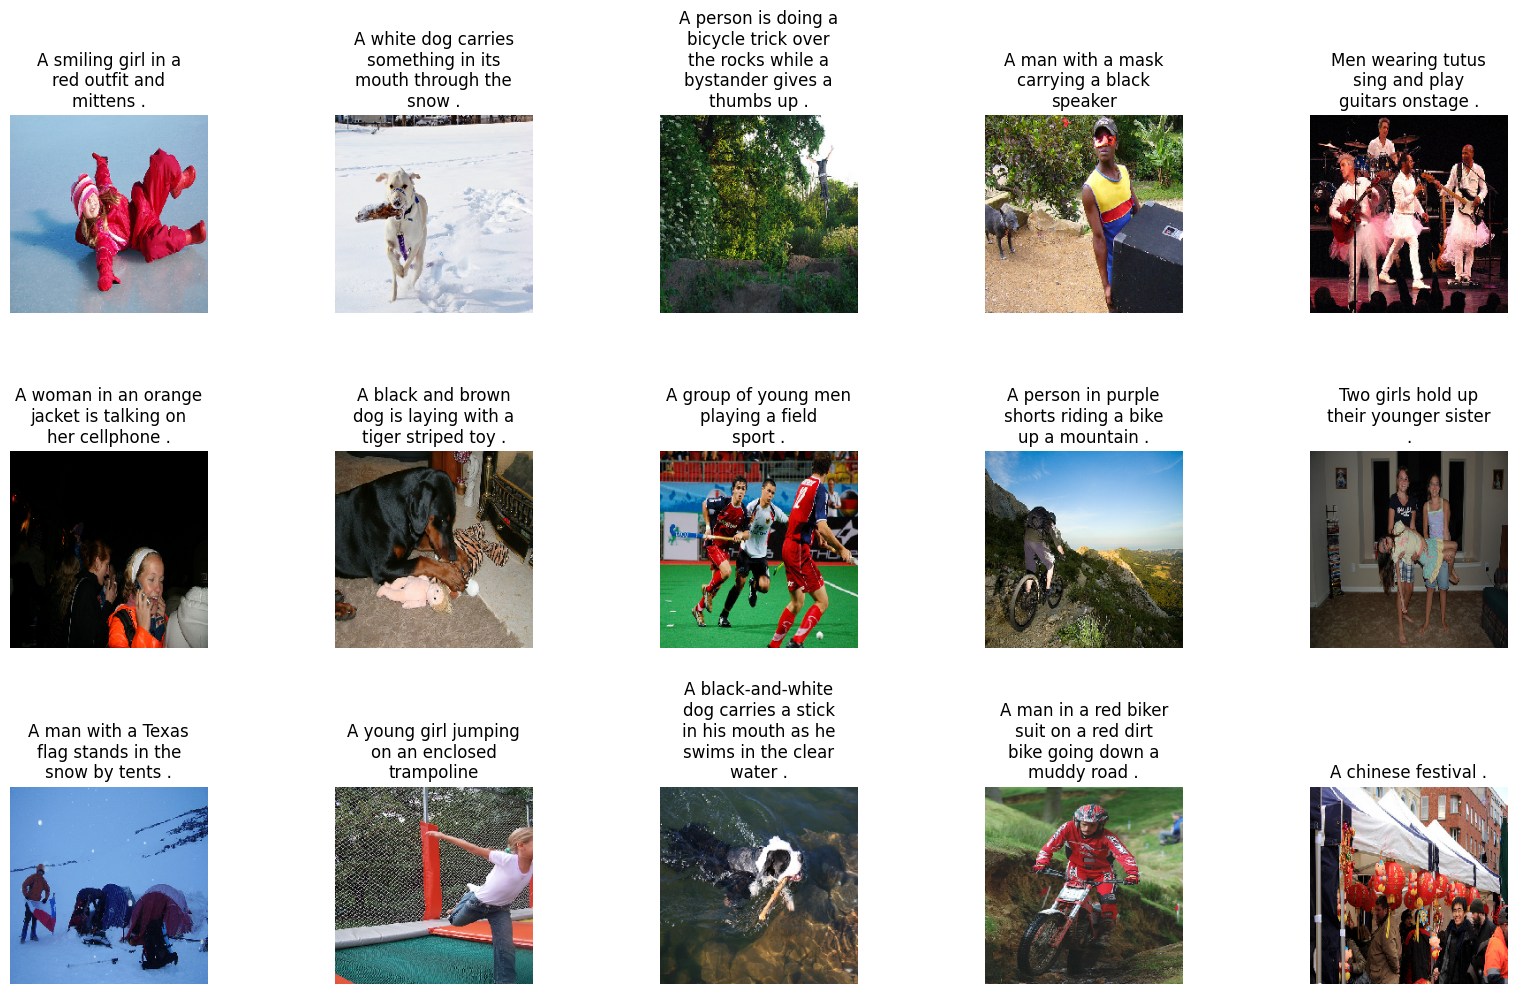

In [6]:
display_images(data.sample(15))